# Geospatial Mapping of Global CO2 emissions


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> This task requires you to use the dataset, World_CO2.csv. The dataset contains CO2 emission (in kt) corresponding to the various countries. Use the GeoPandas or similar Python based GIS tool to plot a choropleth map representing the world CO2 emissions for the year 2015. 
     
 <span style='font-family:Georgia'> The solution for this task should describe all the major steps taken for generating the choropleth map. All the functions, libraries and coding steps should be explained in a lucid manner. The major steps for generating the choropleth would typically involve, importing the datasets using appropriate Python libraries, data cleaning, geospatial operations, and plotting. The Jupyter notebook should be able to reproduce the choropleth maps without any error. 
 
</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> HINT 1: To plot choropleth maps during the studio session, we used naturalearth_lowres data available with GeoPandas. The geometry column played key role in transforming the polygon geometry of each country into corresponding map. In the World_CO2.csv we do not have such geometry column. On the other hand, we do have a column for country code. Can you notice similar kind of country code in naturalearth_lowres data? If yes, then can you think of a join operation which could enable you to use the geometry column of naturalearth_lowres for generating the desired choropleth map (Global CO2 emissions)? 
 
</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> HINT 2: You may need to perform some data cleaning as part of the data pre-processing. This could involve removing the countries for which no or minimal data are available. This could also involve taking care of any missing values.
</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Upon completion of the above exercise, you should now be able to complete the Task 1.1 of the assignment. The data to be used in the assessment is also adopted from the same source, the World Bank. You can follow the similar types of steps for generating the chororpleths as required in the Task 1.1. Please note that you must attempt the assignment independently. The ideas discussed during this workhsop session can be used to find the solution to the Task 1.1 but you must describe the steps in your own words without indulging in any forms of Academic Unfair Practice.
</div>

# Workshop deliverable

You are required to submit a copy of this solved Jupyter notebook through the Workshop 6 Submission Point on the Moodle. Please note that your submission should only contain the workshop task and you must NOT submit any actual task of the assessment at this stage.

### Imports

In [459]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot as gplt

### Reading dataset and performing analysis

In [460]:
df = pd.read_csv("World_CO2.csv", header=2)

In [461]:
df.head() # checking the first five rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,...,1349.456,861.745,872.746,898.415,883.747,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,10755.311,9050.156,8467.103,9035.488,8672.455,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,34176.440,33692.396,44851.077,34583.477,34693.487,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4924.781,4913.780,5489.499,4616.753,4536.079,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,487.711,476.710,462.042,465.709,469.376,NaN,NaN,NaN,NaN,NaN


In [462]:
df.shape # checking the shape

(264, 66)

In [463]:
df.info() # df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            201 non-null    float64
 5   1961            202 non-null    float64
 6   1962            204 non-null    float64
 7   1963            205 non-null    float64
 8   1964            211 non-null    float64
 9   1965            211 non-null    float64
 10  1966            211 non-null    float64
 11  1967            211 non-null    float64
 12  1968            211 non-null    float64
 13  1969            211 non-null    float64
 14  1970            212 non-null    float64
 15  1971            213 non-null    float64
 16  1972            214 non-null    float64
 17  1973            214 non-null    flo

### Handling null values and cleaning the dataset

In [464]:
null_counts = df.isnull().sum() # checking for null values before cleaning
null_counts[null_counts > 0] # sum of null values per feature or column

1960            63
1961            62
1962            60
1963            59
1964            53
              ... 
2017           264
2018           264
2019           264
2020           264
Unnamed: 65    264
Length: 62, dtype: int64

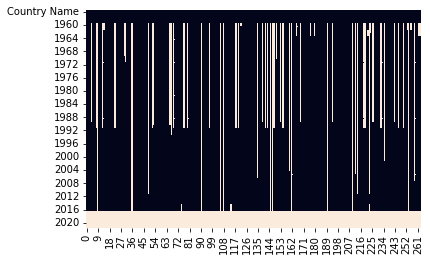

In [465]:
sns.heatmap(df.isna().T, cbar=False) # visualizing the null values for the dataset using a heatmap

In [466]:
# df = df.drop(['2016', '2017', '2018', '2019', '2020'], axis=1) # since 2016 - 2020 contains no data
# df = df.drop('Unnamed: 65', axis=1) # not cleaning the whole dataset for now
df = df[['Country Code', 'Indicator Name', '2015']]
# df = df.dropna() # dropping the remaining null values


In [467]:
null_counts = df.isnull().sum() # checking the sum of null values again after cleaning
null_counts[null_counts > 0] # empty dataset means no more null values

2015    14
dtype: int64

In [468]:
df.shape # checking the shape after cleaning the dataset

(264, 3)

In [469]:
df.head() # checking the head

,Country Code,Indicator Name,2015
0,ABW,CO2 emissions (kt),898.415
1,AFG,CO2 emissions (kt),9035.488
2,AGO,CO2 emissions (kt),34583.477
3,ALB,CO2 emissions (kt),4616.753
4,AND,CO2 emissions (kt),465.709


### Merging the dataframe with naturalearth dataset

In [470]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[['iso_a3', 'geometry', 'name']]
world.rename(columns = {'iso_a3':'Country Code'}, inplace = True)
world.head()

,Country Code,geometry,name
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [471]:
df = df[['Country Code', 'Indicator Name', '2015']]
df.head()

,Country Code,Indicator Name,2015
0,ABW,CO2 emissions (kt),898.415
1,AFG,CO2 emissions (kt),9035.488
2,AGO,CO2 emissions (kt),34583.477
3,ALB,CO2 emissions (kt),4616.753
4,AND,CO2 emissions (kt),465.709


In [472]:
df_merged = world.merge(df, on='Country Code')

In [473]:
df_merged

,Country Code,geometry,name,Indicator Name,2015
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,CO2 emissions (kt),2156.196
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,CO2 emissions (kt),12933.509
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CO2 emissions (kt),549430.277
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,CO2 emissions (kt),5126913.374
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,CO2 emissions (kt),242091.673
...,...,...,...,...,...
162,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,CO2 emissions (kt),7099.312
163,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,CO2 emissions (kt),43919.659
164,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,CO2 emissions (kt),2240.537
165,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,CO2 emissions (kt),46255.538


In [474]:
df_merged.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Plotting the Choropleth map with merged dataframe

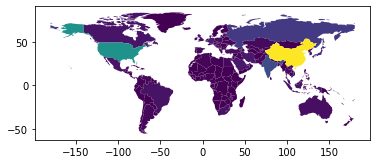

In [475]:
# normal plot of the 
df_merged.plot(column='2015');


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:57: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  'The data being passed to "hue" includes null values. You '
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


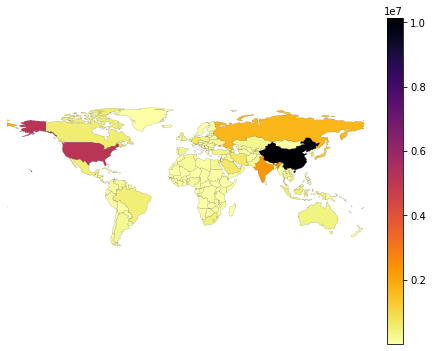

In [476]:
# using geoplot to plot the emissions of different countries in 2015
gplt.choropleth(df_merged, 
    hue="2015", 
    linewidth=.1,
    cmap='inferno_r',
    legend=True,
    edgecolor='black'
)

As seen from the geoplot figure, the co2 emissions were teh highest in China followed by USA, India and Russia